In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
path_to_train = './Data/zip.train'
path_to_test = './Data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_train[0].reshape(16,16))
# print(y_train.shape) (7291,)

(7291, 256)
(7291,)
[[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.631  0.862 -0.167
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.    -0.992  0.297  1.     0.307
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.    -0.41   1.     0.986 -0.565
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -0.683  0.825  1.     0.562 -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -0.938  0.54   1.     0.778 -0.715 -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.     0.1    1.     0.922 -0.439 -1.    -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -0.257  0.95   1.    -0.162 -1.    -1.    -1.
  -0.987 -0.714 -0.832 -1.    -1.    -1.   ]
 [-1.    -1.    -0.797  0.909  1.     0.3   -0.961 -1.    -1.    -0.55
   0.485  0.996  0.867  0.092 -1.    -1.   ]
 [-1.    -1.     0.278  1.     0.877 -0.824 -1.    -0.905

In [15]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img =(1-sample_digits[i].reshape((16, 16)))/2*255
        plt.imshow(img, cmap='gray')
        plt.axis('off')
 

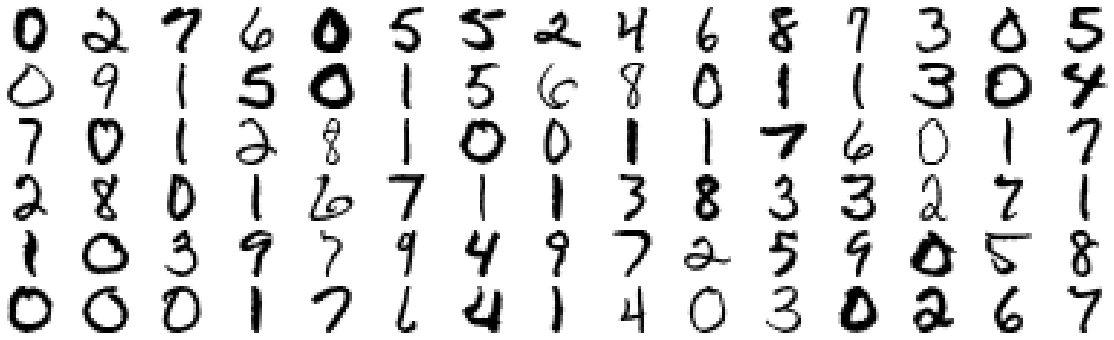

In [16]:
show_numbers(X_train)

In [103]:
class KNearestNeighbors():

    def euclidean_distance(self, x_1, x_2):
        return np.sum((x_1-x_2)**2, axis = 1)
k = 10
kNN = KNearestNeighbors()
squared_distances = kNN.euclidean_distance(X_train, X_test[0])
print(squared_distances.shape)
print(squared_distances)
print(type(squared_distances))

(7291,)
[347.493594 401.407206 223.70639  ... 244.63911  388.289621 243.791766]
<class 'numpy.ndarray'>


In [90]:
def count_list(ls):
    pure_list = np.unique(ls)
    res = []
    for j in pure_list:
        counter = 0
        for i in ls:
            if(i == j):
                counter += 1
        res.append([j, counter])
    return res

def predict_target(number, squared_distances):
    # get k small distances?
    k_distances = squared_distances[np.argpartition(squared_distances, k - 1)][:k]
    indices = []

    # obtain the corresponded indices
    for distance in k_distances:
        i = np.where(squared_distances == distance)[0]
        indices.append(i)

    y_result = []

    for index in indices:
        y_result.append(y_train[index])

    # [[4.0, 10], [7.0, 7], [9.0, 83]]
    res = count_list(y_result)

    times = []
    sum_of_times = 0
    counter = 0
    target_index = 0
    target = 0
    
    for term in res:
        times.append([term[1],counter])
        sum_of_times += term[1]
        counter += 1

    for i in times:
        if(float(i[0] / sum_of_times) >= 0.5):
            target_index = i[1]
            break
    target = res[target_index][0]
    return target

#print(indices)
#print(k_distances)
#print(y_result)
#print(res)
#print(target)
#print(y_test[0])

In [104]:
targets = []
print(np.size(X_test))
print(X_test.shape[0])

# X_test.shape[0]
for i in range(X_test.shape[0]):

    targets.append(predict_target(i, kNN.euclidean_distance(X_train, X_test[i])))

def compare_to_right_label(tar, res):
    judge_list = []
    for i in range(len(tar)):
        if(tar[i] == res[i]):
            judge_list.append(1)
        else:
            judge_list.append(0)
    length = len(judge_list)
    return sum(judge_list) / length
    
print(compare_to_right_label(targets, y_test))

513792
2007
0.9123069257598405


[9. 6. 3. ... 4. 0. 1.]
